In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
sales_data = pd.read_csv('D:\python\proj_2(VIsualization)\SalesData.csv')

## Question 1:- Compare Sales by region for 2016 with 2015 using Bar chart

In [3]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [10]:
region_totsales = sales_data.groupby('Region')[['Sales2015' , 'Sales2016']].sum()

In [12]:
region_totsales_w = sales_data.groupby('Region')[['Sales2015' , 'Sales2016']].sum().reset_index()

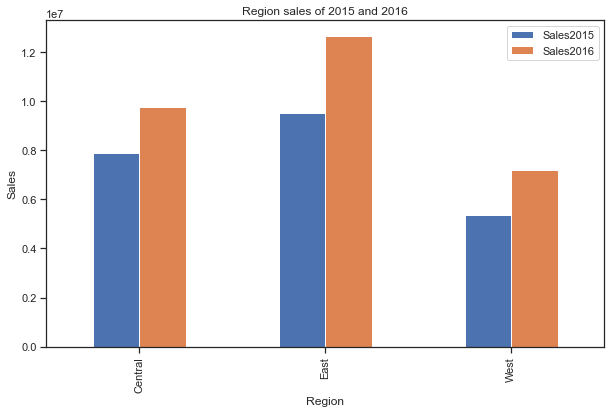

In [19]:
region_totsales.plot(kind='bar' , figsize=(10,6) , )
plt.ylabel('Sales')
plt.title('Region sales of 2015 and 2016')
plt.show()

## Question 2:- What are the contributing factors to the sales for each region in 2016.Visualize it using a pie chart.

In [20]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [21]:
region_sales2016 = sales_data.groupby('Region')[['Sales2016']].sum()

In [22]:
region_sales2016

,Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


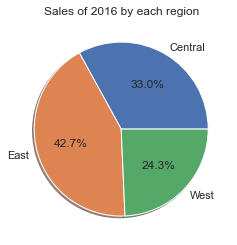

In [30]:
region_sales2016.plot(kind='pie' , subplots=True , autopct = '%.1f%%' , legend=False , shadow=True)
plt.title('Sales of 2016 by each region')
plt.ylabel('')
plt.show()

## Question 3:- Compare the total Sales of 2016 with 2015 with respect to Region and Tiers

In [35]:
sales_tier = sales_data.groupby(['Region' , 'Tier'])[['Sales2015' , 'Sales2016']].sum()

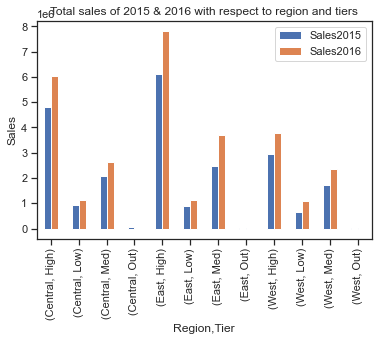

In [39]:
sales_tier.plot(kind = 'bar')
plt.ylabel('Sales')
plt.title('Total sales of 2015 & 2016 with respect to region and tiers')
plt.show()

## Question 4:- In East region,  which state registered a decline in 2016 as compared to 2015? 

In [40]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [44]:
region_state = sales_data.groupby(['Region' , 'State'])[['Sales2015' , 'Sales2016']].sum()

In [50]:
east_region_state = region_state.loc['East']

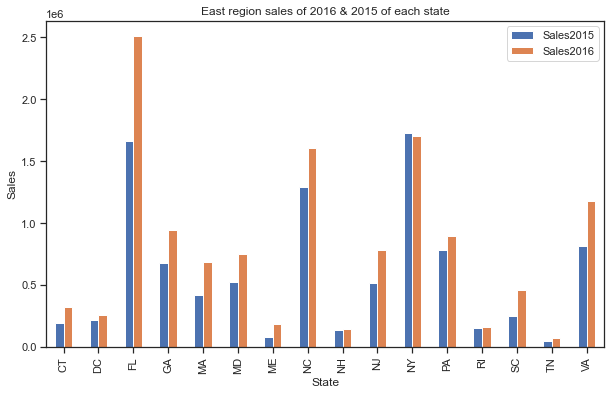

In [54]:
east_region_state.plot(kind='bar' , figsize=(10,6))
plt.ylabel('Sales')
plt.title('East region sales of 2016 & 2015 of each state')
plt.show()

## Question 5:- In all the high tier, which division saw a decline in number of units sold in 2016 compared to 2015?

In [55]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [66]:
tier_div_saless = sales_data.groupby(['Tier' , 'Division'])[['Units2015' , 'Units2016']].sum()

In [67]:
high_tier = tier_div_saless.loc['High']

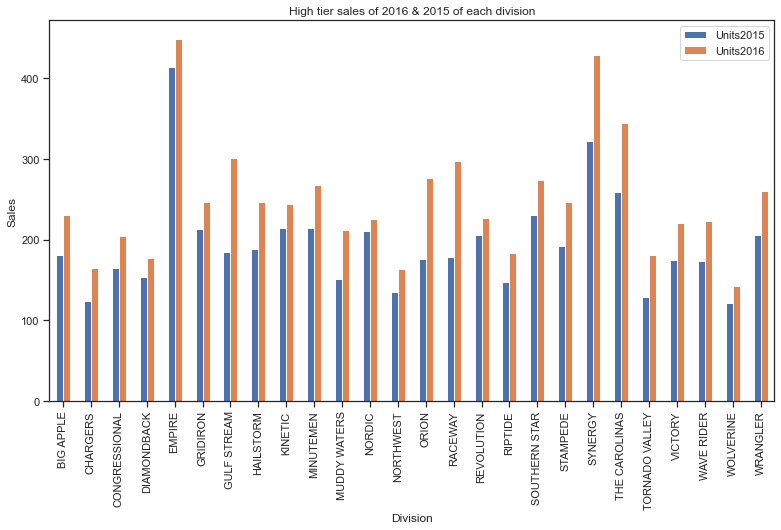

In [73]:
high_tier.plot(kind='bar', figsize=(13,7))
plt.ylabel('Sales')
plt.title('High tier sales of 2016 & 2015 of each division')
plt.show()

## Question 6:-Create a new column Qtr using numpy.where or any suitable utility in the imported dataset.The quarters are based on months and defined as :-
    
#### jan-march :Q1
#### april-june :Q2
#### july-sept :Q3
#### oct-dec :Q4


In [3]:
sales_data.head(10)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0,2.0,1.12,1.02
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54


In [4]:
sales_data['Quarter'] = np.where((sales_data.Month == 'Jan') | (sales_data.Month == 'Feb') | (sales_data.Month == 'Mar') , 'Q1',
                                np.where((sales_data.Month == 'Apr') | (sales_data.Month == 'May') | (sales_data.Month == 'Jun') , 'Q2', 
                                        np.where((sales_data.Month == 'Jul') | (sales_data.Month == 'Aug') | (sales_data.Month == 'Sep') , 'Q3','Q4' )))

In [5]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Quarter
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


## Question 7:- Compare quarter wise sales in 2015 and 2016 in a Bar plot

In [9]:
qtr_sales = sales_data.groupby('Quarter')[['Sales2015' , 'Sales2016']].sum()

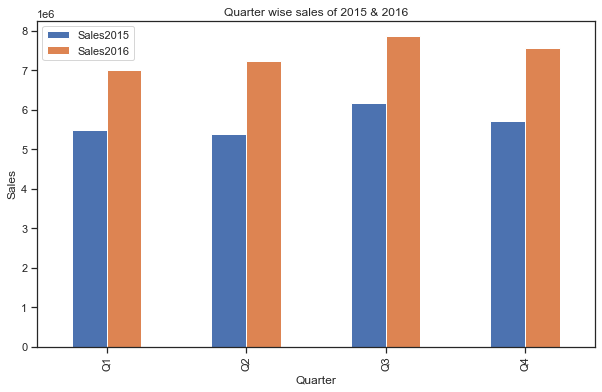

In [12]:
qtr_sales.plot(kind='bar' , figsize=(10,6))
plt.title('Quarter wise sales of 2015 & 2016')
plt.ylabel('Sales')
plt.show()

## Question 8:- Determine the composition of quarter wise sales in 2016 with regards to all the Tiers in a pie chart.

In [14]:
qtr_tier_sales = sales_data.groupby(['Quarter' , 'Tier'])[['Sales2016']].sum()

In [15]:
qtr_tier_sales

Sales2016
Quarter Tier              
Q1      High  3.867719e+06
        Low   9.488328e+05
        Med   2.181402e+06
        Out   0.000000e+00
Q2      High  4.130953e+06
        Low   8.905948e+05
        Med   2.215814e+06
        Out   0.000000e+00
Q3      High  4.872559e+06
        Low   7.951777e+05
        Med   2.197058e+06
        Out  -3.248530e+03
Q4      High  4.740002e+06
        Low   7.426594e+05
        Med   2.085207e+06
        Out   0.000000e+00

In [16]:
qtr_tier_sales.plot(kind='pie' , subplots=True , autopct = '%.1f%%' , legend=False)
plt.show()

ValueError: None doesn't allow negative values

In [18]:
qtr_q1 = qtr_tier_sales.loc['Q1']

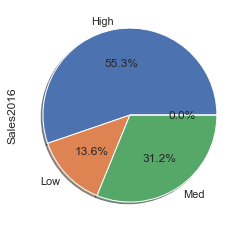

In [19]:
qtr_q1.plot(kind='pie' , subplots=True , autopct = '%.1f%%' , legend=False , shadow=True)
plt.show()

In [20]:
qtr_q2 = qtr_tier_sales.loc['Q2']

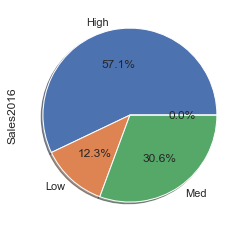

In [21]:
qtr_q2.plot(kind='pie' , subplots=True , autopct = '%.1f%%' , legend=False , shadow=True)
plt.show()

In [22]:
qtr_q3 = qtr_tier_sales.loc['Q3']

In [23]:
qtr_q3.plot(kind='pie' , subplots=True , autopct = '%.1f%%' , legend=False , shadow=True)
plt.show()

ValueError: None doesn't allow negative values

In [24]:
qtr_q4 = qtr_tier_sales.loc['Q4']

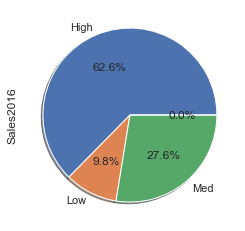

In [25]:
qtr_q4.plot(kind='pie' , subplots=True , autopct = '%.1f%%' , legend=False , shadow=True)
plt.show()